# Predicting the amount of calories burned during exercise

The amount of calories burnt may depend upon a lot of factors such as:
* Duration of exercise
* Rate of heart beat
* Body Temperature
* Height and Weight

## Importing required packages and libraries

In [26]:
%%capture
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
!pip install xgboost

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Loading and analysing the datasets

In [28]:
calories_data = pd.read_csv('calories.csv')
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [29]:
exercise_data = pd.read_csv('exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [30]:
data = pd.concat([exercise_data, calories_data['Calories']], axis = 1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [32]:
#One hot encoding categorical Gender variable
one_hot = pd.get_dummies(data['Gender'], dtype = float)
data = data.join(one_hot)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,0.0,1.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1.0,0.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,0.0,1.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1.0,0.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1.0,0.0


In [33]:
data.shape

(15000, 11)

In [34]:
data.isnull().sum() #Checking for missing/null values

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
female        0
male          0
dtype: int64

In [35]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533,0.503533,0.496467
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978,0.500004,0.500004
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000,0.000000,0.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000,0.000000,0.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000,1.000000,0.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000,1.000000,1.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,1.000000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

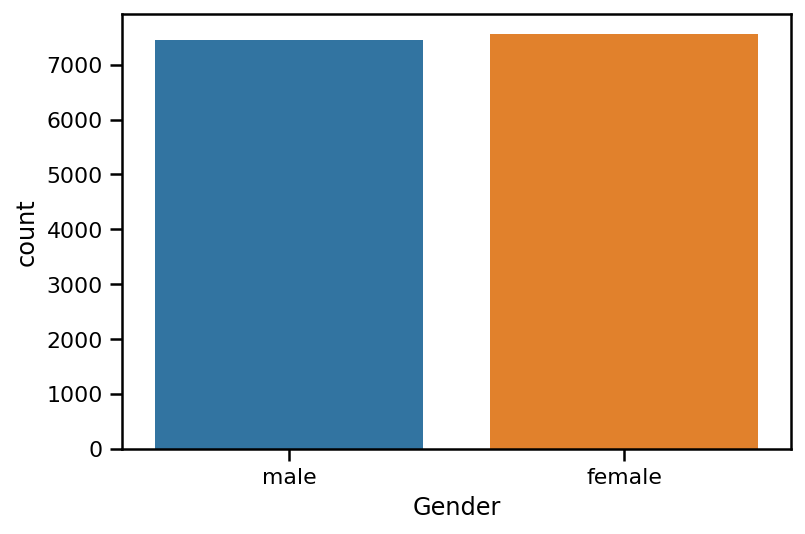

In [36]:
sns.set_context("notebook")
sns.countplot(data["Gender"])

<Axes: xlabel='Age'>

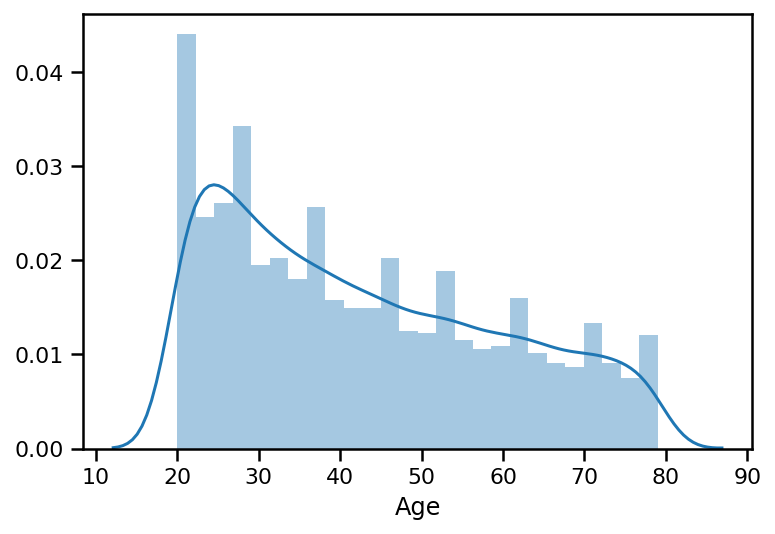

In [38]:
sns.distplot(data["Age"])

<Axes: xlabel='Height'>

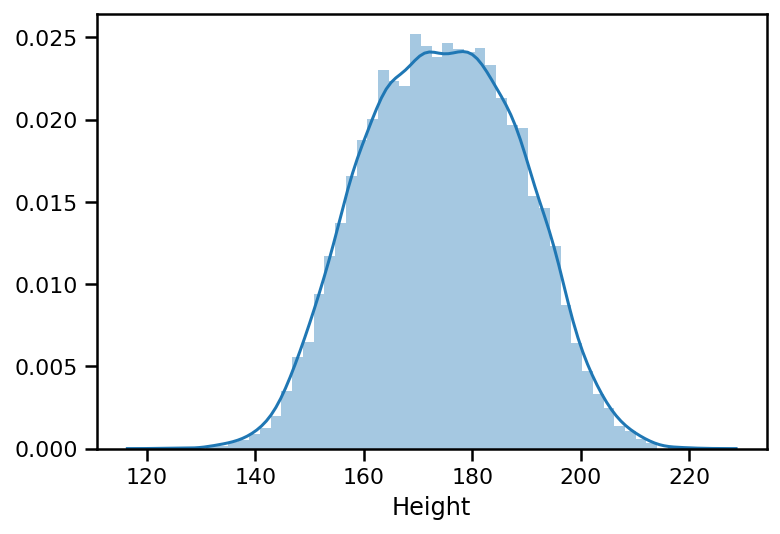

In [39]:
sns.distplot(data["Height"])

<Axes: xlabel='Weight'>

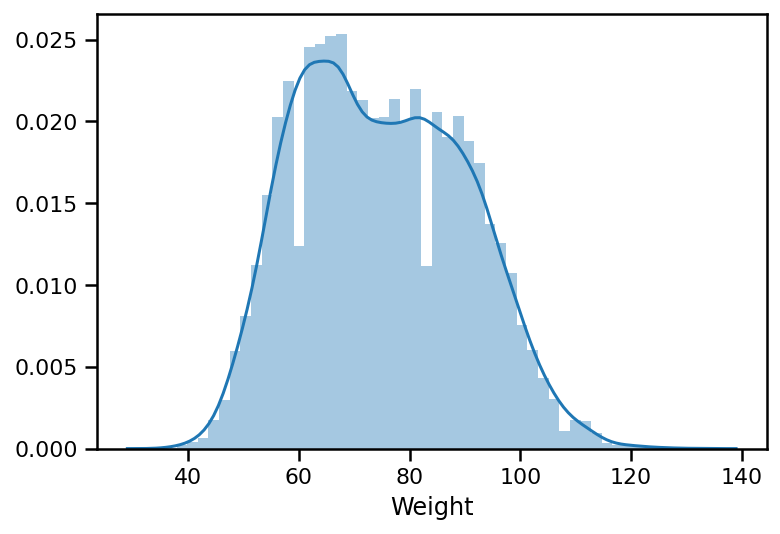

In [40]:
sns.distplot(data["Weight"])

<Axes: xlabel='Heart_Rate'>

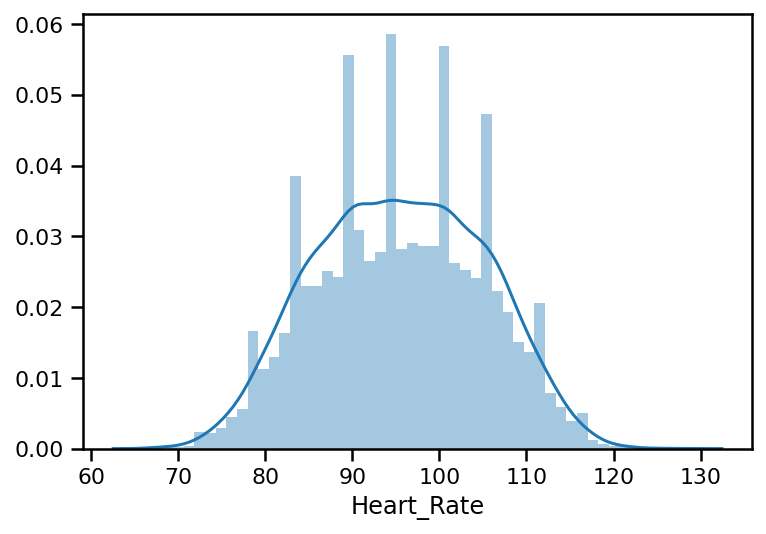

In [41]:
sns.distplot(data["Heart_Rate"])

<Axes: xlabel='Body_Temp'>

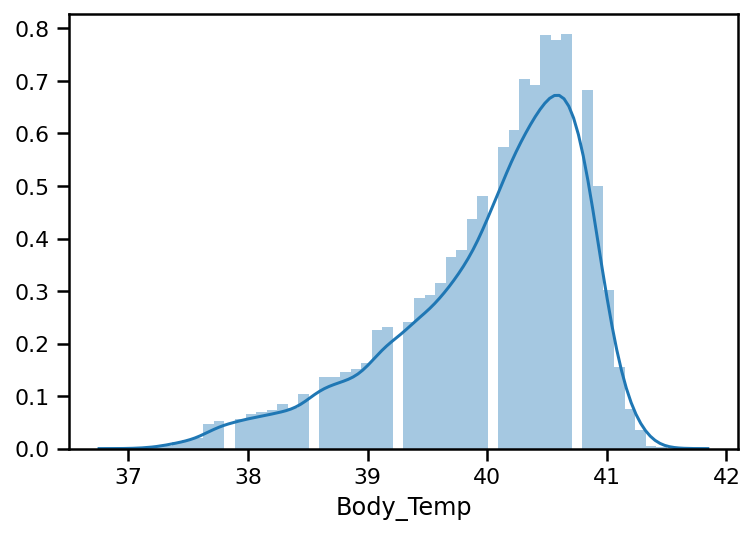

In [42]:
sns.distplot(data["Body_Temp"])

<Axes: xlabel='Calories'>

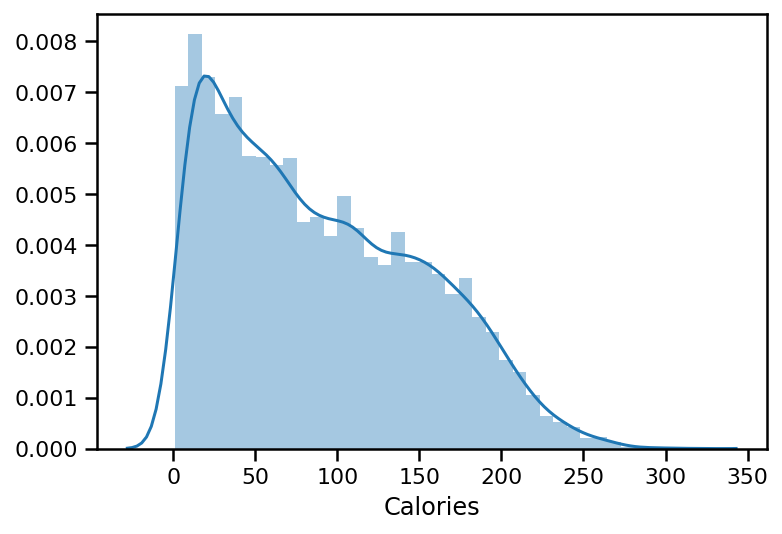

In [43]:
sns.distplot(data["Calories"])

<Axes: xlabel='Duration'>

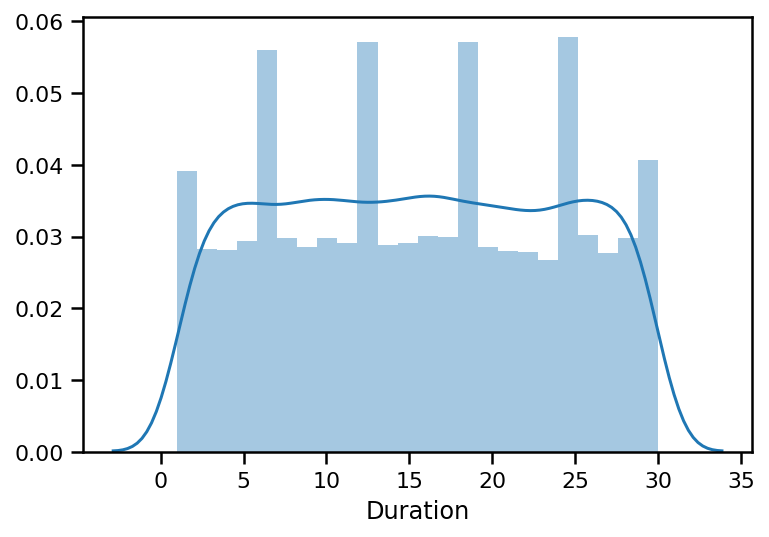

In [44]:
sns.distplot(data["Duration"])

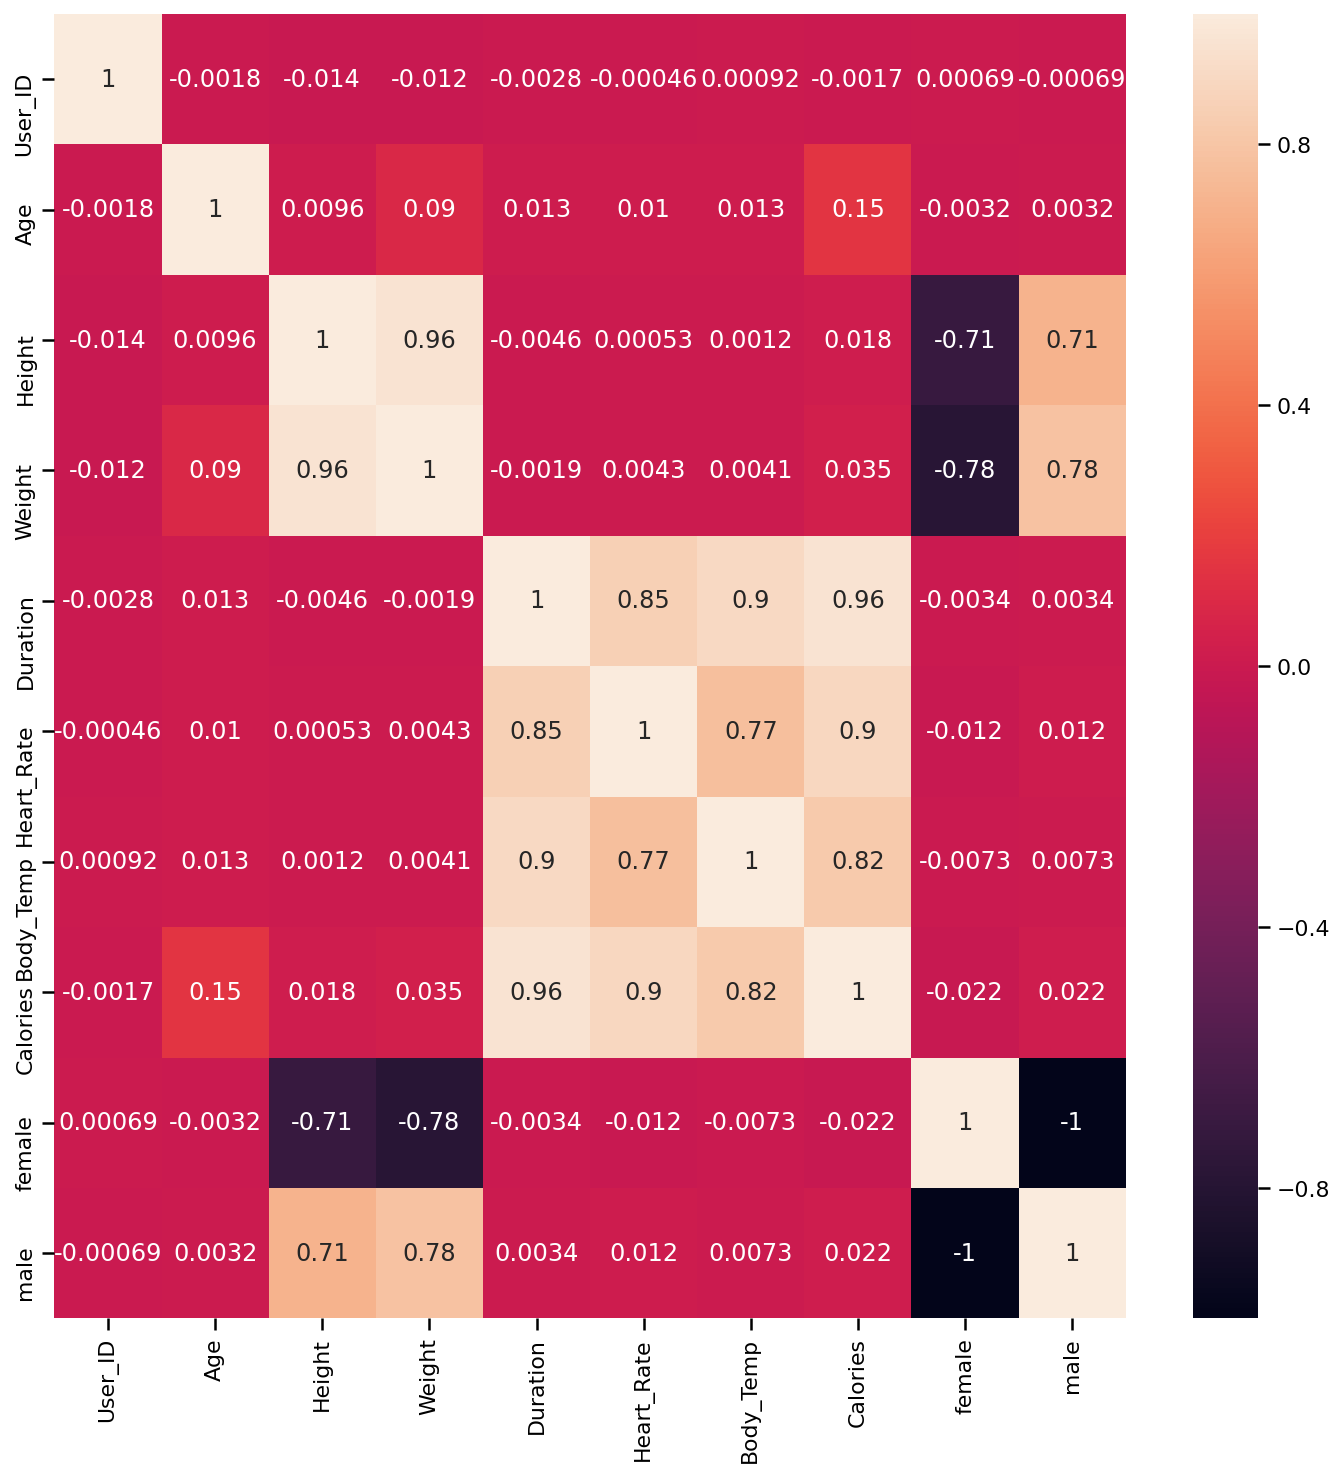

In [50]:
plt.figure(figsize = (12,12));
sns.heatmap(data.corr(), annot = True);

## Separating Features and Targets

In [60]:
X = data.drop(columns = ["User_ID", "Calories"], axis = 1)
y = data["Calories"]

## Creating Train-Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [62]:
X_train.shape, X_test.shape

((13500, 8), (1500, 8))

In [56]:
data = data.drop('Gender', axis = 1)

## Training and Predicting with the XGBoost Model

In [63]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
predictions = model.predict(X_test)

In [68]:
mae = round(metrics.mean_absolute_error(y_test, predictions), 2) 
print("Mean Absolute Error is: ", mae)

Mean Absolute Error is:  1.46


## Conclusion

* The Mean Absolute error is very less, indicating a good model prediction
* A positive correlation between heart rate and calories burnt is observed